## ***YOUTHRIVE DATA SCIENCE CAPSTONE PROJECT***


### ***PROJECT TITLE:     INCOME LEVEL PREDICTION***

This project is focused on developing a logistic regression model to predict the income level of a person, if it exceeds $50k/year or less than.
Using some demographic features provided. 

Logistic Regression is used as a classification algorithm that models the probability of a binary outcome.

The various steps or processes carried out include:
- Data preprocessing: Handling missing values, Encoding Categorical Features, Scaling numerical features and removing outliers.
- Hyperparameter tuning was carried out using GridSearchCV to optimize model performance.
- A confusion matrix was generated to evaluate the predictive accuracy of the model.
- Other evaluation metrics such as precision, recall, F1 score and ROC-AUC was also generated. All these provides a more detailed view of the model's performance.



In [44]:
# importing all necessary libraries needed for the analysis and building a machine model
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
from scipy.stats import zscore
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay



style.available 
style.use("ggplot")

### ***DATA COLLECTION AND PREPARATION***

This is done by first loading the data set then cleaning the dataset, which is data preprocessing. This is necessary to make the dataset fit for Exploratory Data Analysis (EDA)

### ***INITIAL DATA INSPECTION***

In [2]:
# importing the file needed to work it

file = "income_data.csv"
df = pd.read_csv(file)

df.head() # This is done so as to get an overview of what the data looks like, understanding the parameters.

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
income            object
dtype: object

In [4]:
df.shape

(48842, 15)

In [5]:
# Identifying the Numerical and Categorical Variables

# categorical Variables
categorical_columns = df.select_dtypes(include = ['object']).columns.tolist()
print("Categorical Variables:", categorical_columns)

print("==========================================================================================================")

# Numerical Variables
numerical_columns = df.select_dtypes(include = ['int64', 'float64']).columns.tolist()
print("Numerical Variables:", numerical_columns )


Categorical Variables: ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country', 'income']
Numerical Variables: ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']


In [6]:
# converting the object columns to category

for col in categorical_columns:
    df[col] = df[col].astype('category')

# to confirm if the changes has been effected 

df.dtypes

age                  int64
workclass         category
fnlwgt               int64
education         category
education-num        int64
marital-status    category
occupation        category
relationship      category
race              category
sex               category
capital-gain         int64
capital-loss         int64
hours-per-week       int64
native-country    category
income            category
dtype: object

In [7]:
# Knowing each columns with missing values and the number of missing values in each column

df.isna().sum()

# The workclass column has 963 missing variables
# occupation has 966 missing values
# Native country has 274 missing values

age                 0
workclass         963
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation        966
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    274
income              0
dtype: int64

In [11]:
# fillling the missing variables, this has to be done for each column

df["workclass"].unique() # this shows each distinct character in the workclass column

['State-gov', 'Self-emp-not-inc', 'Private', 'Federal-gov', 'Local-gov', '?', 'Self-emp-inc', 'Without-pay', 'Never-worked', NaN]
Categories (9, object): ['?', 'Federal-gov', 'Local-gov', 'Never-worked', ..., 'Self-emp-inc', 'Self-emp-not-inc', 'State-gov', 'Without-pay']

In [12]:
df["workclass"].mode() # this is done so as to get the mode value and use it to fill in the missing values

0    Private
Name: workclass, dtype: category
Categories (9, object): ['?', 'Federal-gov', 'Local-gov', 'Never-worked', ..., 'Self-emp-inc', 'Self-emp-not-inc', 'State-gov', 'Without-pay']

In [19]:
df["workclass"].fillna(df["workclass"].mode().values[0], inplace = True)  #replacing the missing values with the modal value


df["occupation"].fillna(df["occupation"].mode().values[0], inplace = True) # inplace is used so as to ensure the operation carried out is permanent


df["native-country"].fillna(df["native-country"].mode().values[0], inplace = True)

In [18]:
df.isna().sum() # this is to confirm if all missing values has been successfully replaced

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [20]:
df.duplicated().sum() # To know the number of duplicates if any

49

In [21]:
df.drop_duplicates(inplace = True)   # dropping the duplicates
df.duplicated().sum()

0

In [8]:
# dropping some columns that are not needful

# drop the 'fnlwgt'column

df.drop(columns=['fnlwgt'], inplace=True)

df.head()  # to check if the column has been dropped successfully

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


## ***EXPLORATORY DATA ANALYSIS***

### ***GENERATING INSIGHTS FROM THE DATASET***

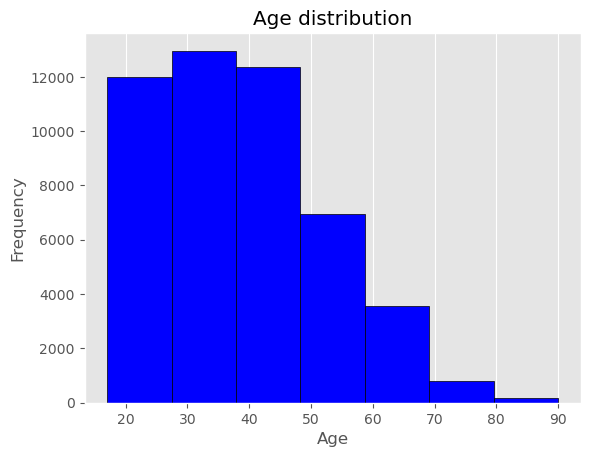

In [9]:
# Age distribution using histogram to visualize the age frequency 

plt.hist(df.age, bins=7, edgecolor='black', color='Blue')  
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age distribution')
plt.grid(axis='y')
plt.show()



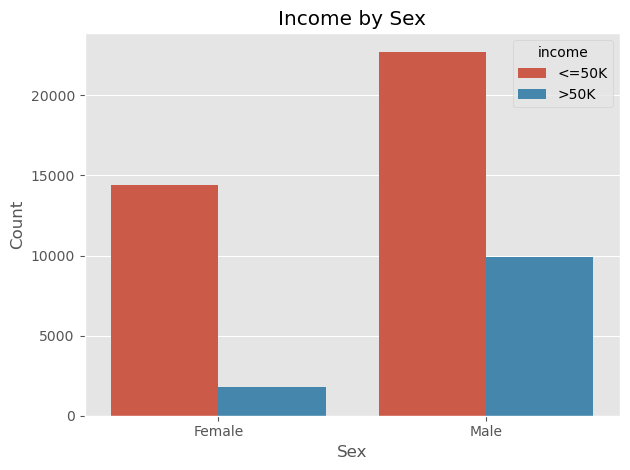

In [10]:
# Income by sex, to evaluate if a certain sex earns higer than the other

sns.countplot(df, x = 'sex', hue = 'income')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Income by Sex')
plt.tight_layout()
plt.show()




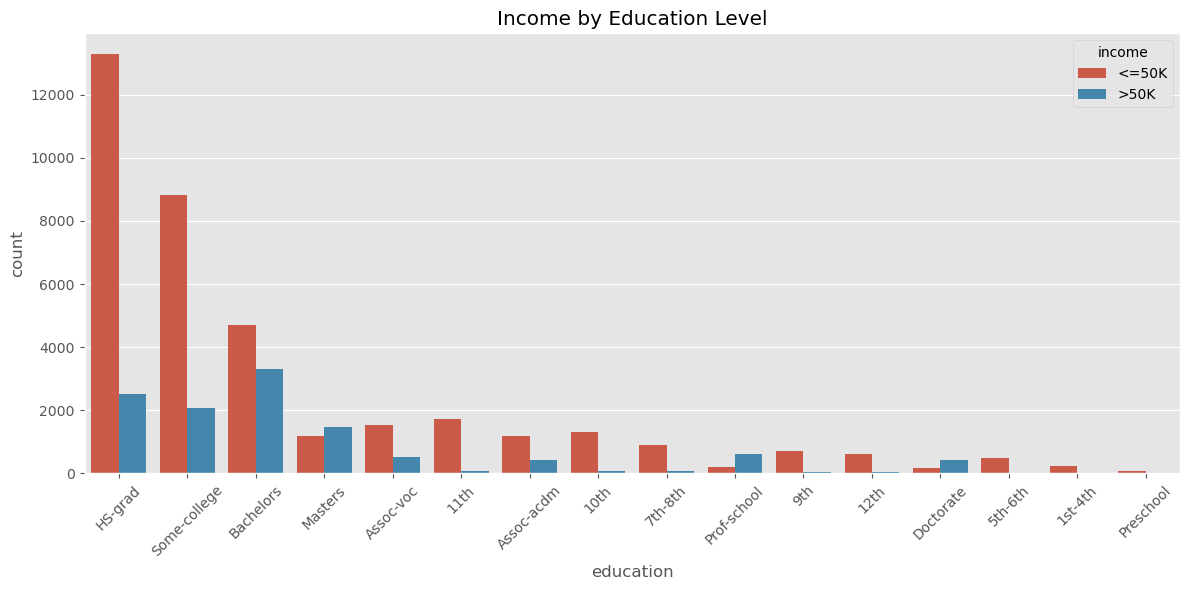

In [11]:
# to show if the Education level has an effect on the income

plt.figure(figsize=(12,6))
sns.countplot(
    data = df,
    x= 'education',
    hue = 'income',


order = df['education'].value_counts().index
)
plt.title("Income by Education Level")
plt.ylabel("count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



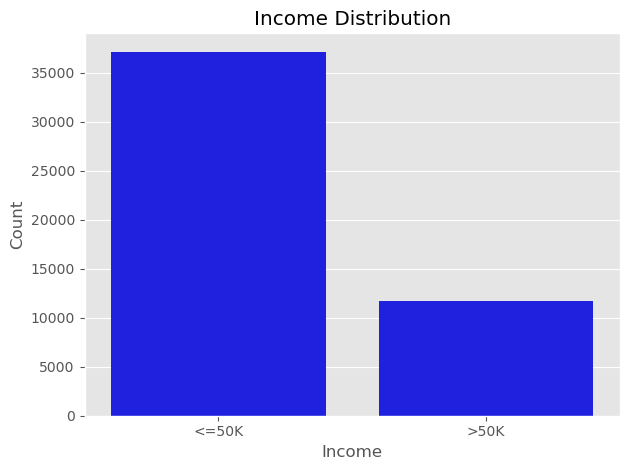

In [12]:
# income distribution
# to determine how the income is being distributed, the chart shows the ratio of income <=50k to >50k

sns.countplot(data =df, x = 'income', color= 'Blue')
plt.title( "Income Distribution")
plt.xlabel("Income")
plt.ylabel("Count")
plt.xticks(rotation =0)
plt.tight_layout()
plt.show()

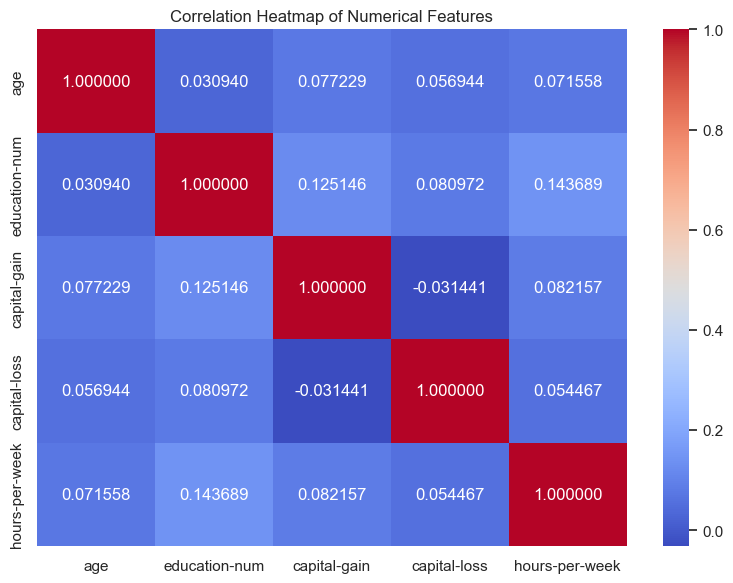

In [13]:
# A correlation heatmap

sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
numerical_corr = df.select_dtypes(include =['int64','float64']).corr()

sns.heatmap(numerical_corr,annot=True, cmap='coolwarm', fmt="2f")
plt.title("Correlation Heatmap of Numerical Features")
plt.tight_layout()
plt.show()



## ***DATA PREPROCESSING AND FEATURE ENGINEERING***

### ***HANDLING MISSING VALUES***

Misisng values had beein treated in the initial data processing stage above, where all missing values were filled with the mode of the respective columns.

### ***Encoding Categorical Variables***

In [14]:
# indentify categorical columns

categorical_columns = df.select_dtypes(include = ['category']).columns.tolist()

# separate the target variable
target = 'income'
features =[col for col in categorical_columns if col != target]


# one- Hot encoding

df_encoded = pd.get_dummies(df,columns=features, drop_first=True)

# Label Encode the target variable which is income, assuming <=50k to be 0 and >50k as 1

df_encoded[target]= df_encoded[target].cat.codes

df_encoded.head()

,age,education-num,capital-gain,capital-loss,hours-per-week,income,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,39,13,2174,0,40,0,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,50,13,0,0,13,0,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,38,9,0,0,40,0,False,False,False,True,...,False,False,False,False,False,False,False,True,False,False
3,53,7,0,0,40,0,False,False,False,True,...,False,False,False,False,False,False,False,True,False,False
4,28,13,0,0,40,0,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False


### ***Feature Scaling***

In [17]:
from sklearn.preprocessing import StandardScaler

# first identify the numerical features

numerical_columns = df_encoded.select_dtypes(include = ['int64', 'float64']).columns.tolist()


scaler = StandardScaler()
df_encoded[numerical_columns]= scaler.fit_transform(df_encoded[numerical_columns])

df_encoded[numerical_columns].head()  # This is to preview some rows in order to confirm if the feature scaling has been effected successfully

,age,education-num,capital-gain,capital-loss,hours-per-week
0,0.025996,1.136512,0.146932,-0.217127,-0.034087
1,0.828308,1.136512,-0.144804,-0.217127,-2.213032
2,-0.046942,-0.419335,-0.144804,-0.217127,-0.034087
3,1.047121,-1.197259,-0.144804,-0.217127,-0.034087
4,-0.776316,1.136512,-0.144804,-0.217127,-0.034087


In [16]:
# removing outliers

z_scores = np.abs(zscore(df_encoded[numerical_columns]))
df_outliers = df_encoded[(z_scores < 3).all(axis = 1)]

z_df =pd.DataFrame(z_scores, columns = numerical_columns)
z_df.head()

,age,education-num,capital-gain,capital-loss,hours-per-week
0,0.025996,1.136512,0.146932,0.217127,0.034087
1,0.828308,1.136512,0.144804,0.217127,2.213032
2,0.046942,0.419335,0.144804,0.217127,0.034087
3,1.047121,1.197259,0.144804,0.217127,0.034087
4,0.776316,1.136512,0.144804,0.217127,0.034087


In [18]:
# PCA (Principal Component Analysis) helps to remove dimensionality in order to improve model performance

x = df_outliers.drop('income', axis=1)
pca = PCA(n_components=0.95)
x_pca = pca.fit_transform(x)
# to check the number of components
print(f"Original number of features: {x.shape[1]}")
print(f"Reduced number of features(PCA): {x_pca.shape[1]}")

Original number of features: 99
Reduced number of features(PCA): 33


## ***MODEL DEVELOPMENT***

### ***TRAIN- TEST SPLIT***

In [19]:
# Train-Test split

X = df_outliers.drop('income', axis=1)
y = df_outliers['income']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 20)

X_train.shape[0] == y_train.shape[0]

True

### Model Selection and Training

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 20)

df_outliers = LogisticRegression(max_iter=5000)

df_outliers.fit(X_train, y_train) # fitting the model to the training data



y_pred = df_outliers.predict(X_test)  # predict on the test set
y_probs = df_outliers.predict_proba(X_test)[:, 1]



In [36]:
# HYPERPARAMETER TUNING WITH GridSearchCV
df_outliers = LogisticRegression(max_iter=5000, random_state =20, solver='liblinear')

# defining the parameter grid
param_grid =[
    {'solver': ['liblinear'],
     'penalty': ['l1'],   'C': [0.01, 0.1, 1, 10]},
    
     {'solver': ['liblinear'],
      'penalty': ['l2'],   'C': [0.01, 0.1, 1, 10]},
]

# setup GridSearchCV
grid_search=GridSearchCV(estimator = df_outliers, param_grid= param_grid , cv=5, scoring='f1', n_jobs=-1, verbose=1, error_score='raise')


# fit to training data
grid_search.fit(X_train, y_train)

 

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5, error_score='raise',
             estimator=LogisticRegression(max_iter=5000, random_state=20,
                                          solver='liblinear'),
             n_jobs=-1,
             param_grid=[{'C': [0.01, 0.1, 1, 10], 'penalty': ['l1'],
                          'solver': ['liblinear']},
                         {'C': [0.01, 0.1, 1, 10], 'penalty': ['l2'],
                          'solver': ['liblinear']}],
             scoring='f1', verbose=1)

In [32]:
#Best Parameters
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Best parameters:", grid_search.best_params_)

#Evaluating best model
y_pred = best_model.predict(X_test)


Best parameters: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}


### ***Model Evaluation***

In [38]:
# Evaluating the model

from sklearn.metrics import ( 
accuracy_score, 
classification_report,
confusion_matrix,
precision_score,
f1_score,
recall_score,
roc_auc_score,
roc_curve
)
accuracy = accuracy_score(y_test, y_pred)   #  Accuracy is the ratio of correctly predicted observations to the total observations.

matrix = confusion_matrix(y_test, y_pred)

precision = precision_score(y_test, y_pred, average = None)  #  A high precision indicates a low false positive rate.

recall = recall_score(y_test, y_pred, average = None)  #  A high recall indicates a low false negative rate.
F1_Score = f1_score(y_test, y_pred)

class_report = classification_report(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_probs)
fpr,tpr,thresholds = roc_curve(y_test, y_probs)

# predictions using the best model
y_pred = best_model.predict(X_test)

# Printing the metrics

print("Accuracy:", accuracy)

print("Precision:", precision)

print("Recall:", recall)

print("Class Report:", class_report)

print("F1 Score:", f1_score)

Accuracy: 0.8509626023456517
Precision: [0.88317443 0.70018856]
Recall: [0.93237879 0.56149194]
Class Report:               precision    recall  f1-score   support

           0       0.88      0.93      0.91      7054
           1       0.70      0.56      0.62      1984

    accuracy                           0.85      9038
   macro avg       0.79      0.75      0.77      9038
weighted avg       0.84      0.85      0.84      9038

F1 Score: <function f1_score at 0x000002836FFDED40>


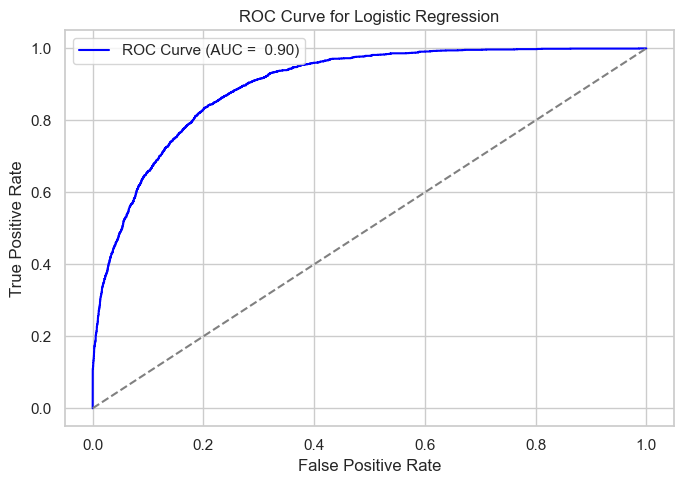

In [25]:
# Plotting the ROC curve
plt.figure(figsize=(7,5))
plt.plot(fpr, tpr, label = f"ROC Curve (AUC = {roc_auc: .2f})", color ='Blue')
plt.plot([0,1], [0,1],
         linestyle = '--', color ='Gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Logistic Regression')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

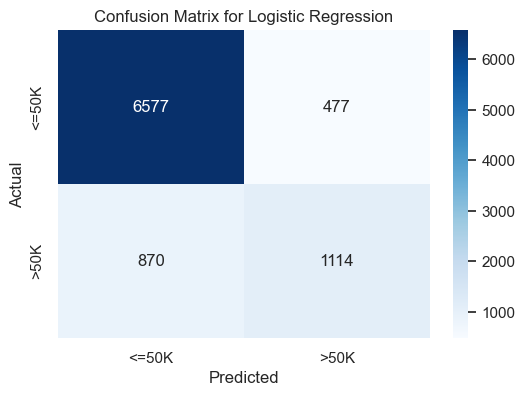

In [41]:
# Generating visuals from the confusion matrix


y_pred = best_model.predict(X_test)

cm= confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot = True, fmt='d', cmap= 'Blues', xticklabels=['<=50K', '>50K'], yticklabels= ['<=50K', '>50K'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()


### Saving the model with joblib

In [42]:
# importing joblib
import joblib

# then save the model to a file
joblib.dump(df_outliers, 'logistic_regression_model.pkl')

['logistic_regression_model.pkl']

## ***SUMMARY AND RECOMMENDATION***

### Key insights from the EDA and observable trends

- Age Distribution: It shows that the age distribution is majorly between 20 - 50 years.
- Income by sex: A higher proportion of males earn >50k compared to females, this shows there is a disparity in the income with respect to gender.
- Income by Education level: People with higher education level are more likely to earn >50k while those with lower education level earn <=50k.
- Income Distribution: The dataset is imbalanced with a wide gap between the number of those earning <= 50k and >50k.
- Correlation heatmap of Numerical features: Its hows that the features are not linearly dependent, which is good for building predictive models
- Education level, work hours and job type are strong factors to consider for the income level.
- Executives, professionals and managerial positions have higher percentages of >50k earners.

The Logistic regression model demonstrates a moderate predictive performance.
Evaluation using the confusion matrix, precision, recall and F1 score provides the following insights:
- Precision and recall: The model is effective at identifying the majority class as the income class (<=50K) is higher.
- The F1 score and ROC curve shows a balanced performance that is useful for binary classification problems.
- Though the model may have weakness with class imbalance, as more individuals earn <=50K leading to a biased predictions towards the majority.

### Recommendation
To improve the model's performance, class imbalance needs to be addressed and other advanced models can be tried also.
